# Youtube Luxury Comment Data Analysis

## 1. Loading Modules and Raw Data

In [1]:
import os
import numpy as np
import pandas as pd


In [175]:
import matplotlib as mpl
from matplotlib import font_manager, rc
import matplotlib.font_manager as fm

In [2]:
path = 'data/' 

In [3]:
os.listdir(path)

['.ipynb_checkpoints',
 'Uncleaned_Merged_Youtube_Comments.csv',
 'youtube_luxury_comments.csv']

In [4]:
raw_comments_df = pd.read_csv(path + 'youtube_luxury_comments.csv')

In [5]:
df = raw_comments_df

## 2. Basic Cleaning of the Data

### 2-1. Eyeballing Data

In [6]:
df.head()

,authorDisplayName,textDisplay,videoId,id,publishedAt,updatedAt
0,한별Hanbyul,안녕하세요!\r\n드디어 명품하울 2탄~💸 영상을 들고 왔어요!\r\n요 며칠 몸이...,yjr2Iaj8Ogc,Ugw_TQ6FrU_0YioBflJ4AaABAg,2018-10-04T09:29:10Z,2018-10-04T09:29:10Z
1,이경민,한별님 한별님이 명품 하울 찍을 때 마다 안녕하세요 한별 입니다 오늘은 여러분들...,yjr2Iaj8Ogc,Ugw_TQ6FrU_0YioBflJ4AaABAg.8lyuCzG-Tsx9AOXDnDoBTR,2020-06-27T02:43:54Z,2020-06-27T02:43:54Z
2,샘조,직업이 따로 있으시나요?,yjr2Iaj8Ogc,Ugw_TQ6FrU_0YioBflJ4AaABAg.8lyuCzG-Tsx96LwYPV4XVf,2020-03-18T16:30:37Z,2020-03-18T16:30:37Z
3,minji seong,덕분에 명품에 대해 1도 몰랐었는데 많이 구경하고 가요\r\n특히 중간에 로고 의미...,yjr2Iaj8Ogc,Ugw_TQ6FrU_0YioBflJ4AaABAg.8lyuCzG-Tsx94lxV3vfpjS,2020-02-08T11:15:36Z,2020-02-08T11:15:36Z
4,서현,샤넬가방 진짜 이뻐요 ㅠㅠ,yjr2Iaj8Ogc,Ugw_TQ6FrU_0YioBflJ4AaABAg.8lyuCzG-Tsx94G-kicDAwt,2020-01-26T16:09:09Z,2020-01-26T16:09:09Z


Check if there are NaN Values or Null Values

In [7]:
df[df['textDisplay'] == 'NaN']

,authorDisplayName,textDisplay,videoId,id,publishedAt,updatedAt


In [8]:
df.loc[df['textDisplay'].isnull() != False]

,authorDisplayName,textDisplay,videoId,id,publishedAt,updatedAt


In [9]:
# Check length
len(df), len(df['videoId'].unique()), len(df['authorDisplayName'].unique())

(15120, 23, 11002)

### 2-2. Cleaning Video Author Data
We found a need to delete author's comments.

In [10]:
df['authorDisplayName'].value_counts(sort=True, ascending=False).head(10)
# ex) 로즈하, 아옳이, 한별...

ᄋᄋ           84
로즈하ROSEHA    40
아옳이          20
ᄋᄋᄋ          19
성이름          19
지구젤리         19
유진           19
김민재          18
한별Hanbyul    17
지은           15
Name: authorDisplayName, dtype: int64

#### Get Author Display Names from Youtube

In [19]:
from pytube import YouTube

author_list = list()
video_author_dict = dict()

for video_id in df['videoId'].unique():
    author = YouTube('https://www.youtube.com/watch?v=' + str(video_id)).author
    author_list.append(author)
    video_author_dict[video_id] = author
    
author_list = np.unique(author_list)

In [20]:
author_list = list(np.unique(author_list))

In [11]:
author_list 

#### Clear Comments from Author

In [12]:
for author in author_list:
    df.drop(df.loc[df['authorDisplayName'] == author].index, inplace = True)

In [13]:
df['authorDisplayName'].value_counts(sort=True, ascending=False).head(10)

ᄋᄋ         84
유진         19
지구젤리       19
ᄋᄋᄋ        19
성이름        19
김민재        18
김지은        15
지은         15
hoho ho    14
김민지        13
Name: authorDisplayName, dtype: int64

#### Delete Duplicate Comments from Same Commentor

In [14]:
df.drop_duplicates(subset = ['authorDisplayName', 'textDisplay'])

,authorDisplayName,textDisplay,videoId,id,publishedAt,updatedAt
1,이경민,한별님 한별님이 명품 하울 찍을 때 마다 안녕하세요 한별 입니다 오늘은 여러분들...,yjr2Iaj8Ogc,Ugw_TQ6FrU_0YioBflJ4AaABAg.8lyuCzG-Tsx9AOXDnDoBTR,2020-06-27T02:43:54Z,2020-06-27T02:43:54Z
2,샘조,직업이 따로 있으시나요?,yjr2Iaj8Ogc,Ugw_TQ6FrU_0YioBflJ4AaABAg.8lyuCzG-Tsx96LwYPV4XVf,2020-03-18T16:30:37Z,2020-03-18T16:30:37Z
3,minji seong,덕분에 명품에 대해 1도 몰랐었는데 많이 구경하고 가요\r\n특히 중간에 로고 의미...,yjr2Iaj8Ogc,Ugw_TQ6FrU_0YioBflJ4AaABAg.8lyuCzG-Tsx94lxV3vfpjS,2020-02-08T11:15:36Z,2020-02-08T11:15:36Z
4,서현,샤넬가방 진짜 이뻐요 ㅠㅠ,yjr2Iaj8Ogc,Ugw_TQ6FrU_0YioBflJ4AaABAg.8lyuCzG-Tsx94G-kicDAwt,2020-01-26T16:09:09Z,2020-01-26T16:09:09Z
5,깡뚱,진짜넘나이쁘네요.말도 되게조곤조곤 잘하시는것같아요ㅎㅎ 뭔가 패션을이해하고 사랑하시는...,yjr2Iaj8Ogc,Ugw_TQ6FrU_0YioBflJ4AaABAg.8lyuCzG-Tsx9-pEcM0divf,2019-10-08T11:14:46Z,2019-10-08T11:14:46Z
...,...,...,...,...,...,...
15115,하이하,언니는 진짜 인간자체명품이에요ㅠ,j3Ybe36WTJI,Ugy1de5o2zYAvBXhyJd4AaABAg.99-VwLKoLqf990FnTh628a,2020-05-23T19:58:27Z,2020-05-23T19:58:27Z
15116,김나연,1번째 댯글~!!!,j3Ybe36WTJI,Ugw_pfSQfPBU1PFFCKN4AaABAg,2020-05-23T13:00:11Z,2020-05-23T13:00:11Z
15117,한세린,"꺄앙ㄱ 언니💗💗1빠,,, ㅠ",j3Ybe36WTJI,UgwLCCPakNBzqYvpK9x4AaABAg,2020-05-23T13:00:08Z,2020-05-23T13:01:04Z
15118,purple lee,1빠다,j3Ybe36WTJI,UgzILto-rqaWHLLkhPZ4AaABAg,2020-05-23T13:00:04Z,2020-05-23T13:00:04Z


### 2-3. Aggregate Comments of Video

In [15]:
Merged_df = pd.pivot_table(df, values='textDisplay', index='videoId', aggfunc = lambda x : ''.join(x))

In [34]:
Merged_df = Merged_df.rename(columns={'textDisplay' : 'mergedComments'})

In [17]:
with pd.option_context('display.max_colwidth', None):
    display(Merged_df.iloc[0])

textDisplay    알고리즘에 의해 보게 되었는데 아옳이님 정말 매력적이시네요!!\r\n옷을 정말 사랑하시는 분 같은데 혹시 나중에 생활 팁으로 '옷 세탁 컨텐츠'도 찍어주시면 정말 좋을 것 같아요\r\n영상 잘 보고 있습니다 감사합니다^^여러분 이거 아무나 사지 마세욧..! 이분이어서 어울리는거니까..☆☆  \r\n선남선녀커플 등급♡♡이 집 옷이 이쁘네요.ㅋㅋㅋ거적대기를 입어두이쁠언냐..남이 옷입는게 이렇게 사랑스럽고 예쁠일인가여 ㅠㅅㅠ넘 재밌어요 😍😍😍😍\r\n저 매장 룩 진짜 이쁘다요 🤎🤎민트옷이 넘 잘어울려요,,한국은 사이즈가m까지만 들어오는군요ㅠ하나하나가 다 레전드네 미쳤다리 ㅠ다 잘 어울려오이언니 진쨔 너무 이뿌고 귀엽댴옷은 정말 이쁜데!! 가격은 그리 이쁘지 않아...ㅋㅋ아언니진짜진심너무구ㅏ엽다 미쳣어 너무기여워 신나서 랄랄라하는 공주님같네 ㅠㅠㅠ세상에 옷 입을 맛 나시겠어요 ㅜㅜㅠ 부러워요명품매장이나 저런백화점 매장에서 대놓고 사진촬영 못하지않나요?  광고성이 아닌이상?능력있고 예쁘고 돈 잘벌고 잘생긴 남편 뒀고 ... 와 언니는 정말 최고에여 ... ❤️❤️옷들이 다너무 예쁘고 좋은데 세탁을 어찌  하실찌?ㅜㅜ협챠늊ㄴㅉ진짜 이언니 너무 사랑스럽다...❤️옷 진짜 이쁘다잘어울리는 원피스 진짜 많앗다요!! 저렇게 돈쓰는데 하루가 쟈미없을수가 없죠...(쥬륵)언니 진짜...세상만사 옷이됐든 악세서리가 됐든 다 소화시켜버리는 인간 활명수,,ㅠ\r\n않히 그래서 그런지 귀걸이가 넘 이뻐보이는것,,영상 재탕을 너무 많이해서 그랬는지 영상에서 소개했었던걸로 기억했는데...아니였고..\r\n귀걸이 정보 아시는분 있으면...ㅏ원츄ㅏ원츄D져라 재수없네 다 대출???6:33 미쳤담쳤다 너무 예뻐 미쳤다 언니 뭐야머지 이 부부.. 자꾸 보게 돼 ㄹㅇ 인간마약이시네들하 진짜 언니... 언니 공주 맞지?언니 열정 100분의1만 나눠주세요 😂😂이분 레알 부럽다...안히 언니가 입으니까 옷걸이에 걸려 있을 때랑 느낌 너무 다르잖아 옷이 언니빨 받잖아남편분    아옳

### 2-4. Merge Author-Video and Video-Comments Data

#### Create and Check DataFrame of Video-Author Data

In [23]:
video_author_df = pd.DataFrame(
    {'videoId' : video_author_dict.keys(),
     'videoAuthor': video_author_dict.values()})


In [24]:
for video, author in video_author_dict.items():
    true_false = video in video_author_df.loc[video_author_df['videoAuthor'] == author]['videoId'].tolist()
    if not true_false:
        print('something misassigned')

In [29]:
Merged_df = Merged_df.merge(video_author_df, on='videoId')

#### Now save uncleaned merged comment data.

In [36]:
Merged_df.to_csv(path + 'Uncleaned_Merged_Youtube_Comments.csv')

## 3. Cleaning Comments Data

#### Load Data and Modules

In [90]:
Uncleaned_Merged_df = pd.read_csv(path + 'Uncleaned_Merged_Youtube_Comments.csv')

In [91]:
df = Uncleaned_Merged_df

In [86]:
import re

import emot


from soynlp.normalizer import *

### 3-1 Basic String Cleaning

#### Basic Regular Expression Patterns

In [ ]:
re_english = re.compile(r'[A-Za-z]')
re_whitespace = re.compile(r'\s\s+')
re_numbers = re.compile(r'[0-9]+')
re_urls = re.compile(r'https?://\S+|www\.\S+')


### 3-1 Handling Emoticons

#### Emoticon Handling and Normalizing

In [64]:
# Emoticon Handling https://studymachinelearning.com/text-preprocessing-handle-emoji-emoticon/
try:
    import cPickle as pickle
except ImportError:
    import pickle  

with open('Emoticon_Dict.p', 'rb') as fp:
    Emoticon_Dict = pickle.load(fp)

with open('Emoji_Dict.p', 'rb') as fp:
    Emoji_Dict = pickle.load(fp)

def remove_emoticons(text):
    emoticon_pattern = re.compile(u'(' + u'|'.join(k for k in Emoticon_Dict) + u')')
    return emoticon_pattern.sub(r'', text)

def convert_emojis_to_word_1(text):
    for emot in Emoji_Dict:
        text = re.sub(r'('+emot+')', "_".join(Emoji_Dict[emot].replace(",","").replace(":","").split()), text)
    return text

In [87]:
# use the emot library.    
def convert_emojis_to_word_2(text):
    """
    Works under the assumption emoji takes only one space!
    """
    matched_emoji_list = emot.emoji(text)
    if not matched_emoji_list.get('value'):
        return text
    else:
        for num in range(len(matched_emoji_list.get('location', list()))):
            if matched_emoji_list.get('location')[num][0] - matched_emoji_list.get('location')[num][1] == 0:
                text = text.replace(matched_emoji_list.get('value')[num], matched_emoji_list.get('mean')[num])
        return text

# Reference : https://gist.github.com/slowkow/7a7f61f495e3dbb7e3d767f97bd7304b

re_emoji = re.compile(
    "["
    "\U0001F1E0-\U0001F1FF"  # flags (iOS)
    "\U0001F300-\U0001F5FF"  # symbols & pictographs
    "\U0001F600-\U0001F64F"  # emoticons
    "\U0001F680-\U0001F6FF"  # transport & map symbols
    "\U0001F700-\U0001F77F"  # alchemical symbols
    "\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
    "\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
    "\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
    "\U0001FA00-\U0001FA6F"  # Chess Symbols
    "\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
    "\U00002702-\U000027B0"  # Dingbats
    "]+"
)


In [92]:
def clean_string(string):
    # basic cleaning
    string = re_numbers.sub(' ', string)
    string = re_english.sub(' ', string)
    string = emoticon_normalize(string, num_repeats=2)
    string = repeat_normalize(string, num_repeats=2)
    string = re_whitespace.sub(' ', string)
    string = re_urls.sub('', string)
    
    # remove emoticon and change emoji into english words
    string = remove_emoticons(string)
    string = convert_emojis_to_word_1(string)
    string = convert_emojis_to_word_2(string)
    
    # remove unchanged emoji
    string = re_emoji.sub(' ', string)
    return string

In [105]:
df['mergedComments'] = df['mergedComments'].apply(clean_string)

TypeError: clean_string() got an unexpected keyword argument 'index'

In [107]:
# remove all 'Unnamed' column
df.drop(df.filter(regex="Unname"),axis=1, inplace=True)

#### Save the cleaned Merged Comments with Punctuations.

In [110]:
df.to_csv(path + 'Cleaned_with_Punct_Merged_Youtube_Comments.csv')

## 4. Data Exploration

In [123]:
from konlpy.tag import Okt
from konlpy.utils import pprint

import nltk
twitter = Okt()

### 4-1. Uncleaned Comment Exploration with NLTK

In [236]:
Uncleaned_Merged_df = pd.read_csv(path + 'Uncleaned_Merged_Youtube_Comments.csv')

In [237]:
youtube_luxury_postag = dict()
for row_index, row in Uncleaned_Merged_df.iterrows():
    if pd.isnull(row.mergedComments) :
        posresult = None
    else :
        posresult = twitter.pos(row.mergedComments)
    youtube_luxury_postag[row.videoId] = posresult
    print(len(youtube_luxury_postag), '/', len(Uncleaned_Merged_df.mergedComments), 'completed')
print('DONE!')

1 / 23 completed
2 / 23 completed
3 / 23 completed
4 / 23 completed
5 / 23 completed
6 / 23 completed
7 / 23 completed
8 / 23 completed
9 / 23 completed
10 / 23 completed
11 / 23 completed
12 / 23 completed
13 / 23 completed
14 / 23 completed
15 / 23 completed
16 / 23 completed
17 / 23 completed
18 / 23 completed
19 / 23 completed
20 / 23 completed
21 / 23 completed
22 / 23 completed
23 / 23 completed
DONE!


#### Save and Load Pickle Data so We don't have to Redo Tagging Everytime



In [124]:
import pickle

In [238]:
## Save pickle
with open("youtube_pos_data.pickle","wb") as fw:
    pickle.dump(youtube_luxury_postag, fw)
 



In [135]:
## Load pickle
youtube_luxury_postag = dict()

with open("youtube_pos_data.pickle","rb") as fr:
    youtube_luxury_postag = pickle.load(fr)

#### Use NLTK

In [158]:
import nltk

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\keons\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [150]:
youtube_luxury_total_comments_tokens = list()

for video, tags in youtube_luxury_postag.items():
    youtube_luxury_total_comments_tokens.extend(tags)

In [164]:
text = nltk.Text(youtube_luxury_total_comments_tokens, 'NSMC')

[('알고리즘', 'Noun'),
 ('에', 'Josa'),
 ('의해', 'Adjective'),
 ('보게', 'Verb'),
 ('되었는데', 'Verb'),
 ('아옳이님', 'Noun'),
 ('정말', 'Noun'),
 ('매력', 'Noun'),
 ('적이시네요', 'Verb'),
 ('!!', 'Punctuation'),
 ('\r\n', 'Foreign'),
 ('옷', 'Noun'),
 ('을', 'Josa'),
 ('정말', 'Noun'),
 ('사랑', 'Noun'),
 ('하시는', 'Verb'),
 ('분', 'Noun'),
 ('같은데', 'Adjective'),
 ('혹시', 'Noun'),
 ('나중', 'Noun'),
 ('에', 'Josa'),
 ('생활', 'Noun'),
 ('팁', 'Noun'),
 ('으로', 'Josa'),
 ("'", 'Punctuation'),
 ('옷', 'Noun'),
 ('세탁', 'Noun'),
 ('컨텐츠', 'Noun'),
 ("'", 'Punctuation'),
 ('도', 'Noun'),
 ('찍어주시면', 'Verb'),
 ('정말', 'Noun'),
 ('좋을', 'Adjective'),
 ('것', 'Noun'),
 ('같아요', 'Adjective'),
 ('\r\n', 'Foreign'),
 ('영상', 'Noun'),
 ('잘', 'Verb'),
 ('보고', 'Noun'),
 ('있습니다', 'Adjective'),
 ('감사합니다', 'Verb'),
 ('^^', 'Punctuation'),
 ('여러분', 'Noun'),
 ('이', 'Determiner'),
 ('거', 'Noun'),
 ('아무나', 'Noun'),
 ('사지', 'Noun'),
 ('마세', 'Verb'),
 ('욧', 'Noun'),
 ('..!', 'Punctuation'),
 ('이분', 'Noun'),
 ('이어서', 'Josa'),
 ('어울리는거니까', 'Verb'),
 ('..', 

#### Total Token Numbers and Tokens without duplicate

In [155]:
print(len(text), len(set(text)))

298977 31754


#### Most Common Tokens

In [156]:
pprint(text.vocab().most_common(10))

[(('이', 'Josa'), 5051),
 (('너무', 'Adverb'), 3765),
 (('도', 'Josa'), 3713),
 (('에', 'Josa'), 3582),
 (('영상', 'Noun'), 3267),
 (('언니', 'Noun'), 3235),
 (('가', 'Josa'), 3022),
 (('을', 'Josa'), 2796),
 (('명품', 'Noun'), 2619),
 (('..', 'Punctuation'), 2347)]


#### Try Seeing Only Nouns

In [167]:
def Pos_extractor(input_list, pos_type) :
    return(list(word for word in input_list if str(str(pos_type)) in word))

Noun_Only_Youtube_Luxury_Total_Comments = Pos_extractor(youtube_luxury_total_comments_tokens,'Noun')

In [168]:
text = nltk.Text(Noun_Only_Youtube_Luxury_Total_Comments, 'NSMC')

In [169]:
pprint(text.vocab().most_common(10))

[(('영상', 'Noun'), 3267),
 (('언니', 'Noun'), 3235),
 (('명품', 'Noun'), 2619),
 (('진짜', 'Noun'), 2252),
 (('저', 'Noun'), 1304),
 (('하울', 'Noun'), 1275),
 (('한별', 'Noun'), 1213),
 (('것', 'Noun'), 1163),
 (('설명', 'Noun'), 992),
 (('사람', 'Noun'), 980)]


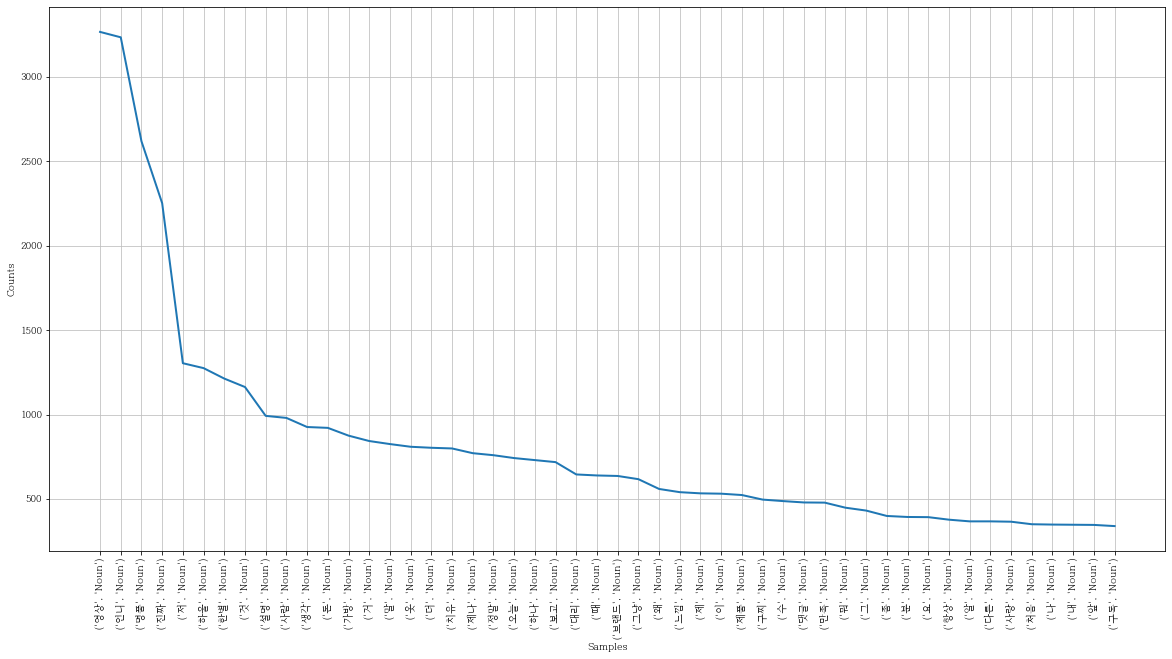

In [181]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
%matplotlib inline

font_fname = 'C:\\Windows\\Fonts\\HANBatang.ttf'
font_name = font_manager.FontProperties(fname=font_fname).get_name()
rc('font', family=font_name)

plt.figure(figsize=(20,10))
text.plot(50)

#### We found a lot of mentions on the video authors.
There is much data to be cleaned, but save it for later

## 5. Cleaned Comment(With Punctuation) LDA

## 5-1. Load Data and Modules

In [182]:
import gensim
from gensim import corpora

In [247]:
Cleaned_df = pd.read_csv(path + 'Cleaned_with_Punct_Merged_Youtube_Comments.csv')

In [253]:
youtube_luxury_postag_by_video = dict()

for row_index, row in Cleaned_df.iterrows():
    if pd.isnull(row.mergedComments) :
        posresult = None
    else :
        posresult = twitter.pos(row.mergedComments)
    youtube_luxury_postag_by_video[row.videoId] = posresult
    print(len(youtube_luxury_postag_by_video), '/', len(Cleaned_df.mergedComments), 'completed')
print('DONE!')

1 / 23 completed
2 / 23 completed
3 / 23 completed
4 / 23 completed
5 / 23 completed
6 / 23 completed
7 / 23 completed
8 / 23 completed
9 / 23 completed
10 / 23 completed
11 / 23 completed
12 / 23 completed
13 / 23 completed
14 / 23 completed
15 / 23 completed
16 / 23 completed
17 / 23 completed
18 / 23 completed
19 / 23 completed
20 / 23 completed
21 / 23 completed
22 / 23 completed
23 / 23 completed
DONE!


### 5-2. Create Tokens for Analysis

#### a) Total Comments Token

In [249]:
youtube_luxury_total_comments_tokens = list()

for video, tags in youtube_luxury_postag_by_video.items():
    youtube_luxury_total_comments_tokens.extend(tags)

In [186]:
# Keep Only Nouns
def Pos_extractor(input_list, pos_type) :
    return(list(word for word in input_list if str(str(pos_type)) in word))

Noun_Only_Youtube_Luxury_Total_Comments = Pos_extractor(youtube_luxury_total_comments_tokens,'Noun')

In [187]:
Noun_Only_Youtube_Luxury_Total_Comments

[('알고리즘', 'Noun'),
 ('아옳이님', 'Noun'),
 ('정말', 'Noun'),
 ('매력', 'Noun'),
 ('옷', 'Noun'),
 ('정말', 'Noun'),
 ('사랑', 'Noun'),
 ('분', 'Noun'),
 ('혹시', 'Noun'),
 ('나중', 'Noun'),
 ('생활', 'Noun'),
 ('팁', 'Noun'),
 ('옷', 'Noun'),
 ('세탁', 'Noun'),
 ('컨텐츠', 'Noun'),
 ('도', 'Noun'),
 ('정말', 'Noun'),
 ('것', 'Noun'),
 ('영상', 'Noun'),
 ('보고', 'Noun'),
 ('여러분', 'Noun'),
 ('거', 'Noun'),
 ('아무나', 'Noun'),
 ('사지', 'Noun'),
 ('욧', 'Noun'),
 ('이분', 'Noun'),
 ('선남선녀', 'Noun'),
 ('커플', 'Noun'),
 ('등급', 'Noun'),
 ('이', 'Noun'),
 ('집', 'Noun'),
 ('옷', 'Noun'),
 ('적대', 'Noun'),
 ('언', 'Noun'),
 ('남', 'Noun'),
 ('옷', 'Noun'),
 ('일인', 'Noun'),
 ('여', 'Noun'),
 ('저', 'Noun'),
 ('매장', 'Noun'),
 ('진짜', 'Noun'),
 ('민트', 'Noun'),
 ('옷', 'Noun'),
 ('한국', 'Noun'),
 ('사이즈', 'Noun'),
 ('하나', 'Noun'),
 ('하나', 'Noun'),
 ('레전드', 'Noun'),
 ('오이', 'Noun'),
 ('진쨔', 'Noun'),
 ('귀엽댴옷', 'Noun'),
 ('정말', 'Noun'),
 ('가격', 'Noun'),
 ('진짜', 'Noun'),
 ('진심', 'Noun'),
 ('구', 'Noun'),
 ('엽다', 'Noun'),
 ('미쳣어', 'Noun'),
 ('무기', 'Noun'),
 

##### Save and Load Token Data

In [254]:
import pickle

In [257]:
## Save pickle
with open("youtube_luxury_total_comments_tokens.pickle","wb") as fw:
    pickle.dump(youtube_luxury_total_comments_tokens, fw)
    
with open("youtube_luxury_total_comments_noun_only_tokens.pickle","wb") as fw:
    pickle.dump(Noun_Only_Youtube_Luxury_Total_Comments, fw)

In [258]:
## Load pickle
youtube_luxury_total_comments_tokens = dict()

with open("youtube_luxury_total_comments_tokens.pickle","rb") as fw:
    youtube_luxury_total_comments_tokens = pickle.load(fw)

Noun_Only_Youtube_Luxury_Total_Comments = list()    
    
with open("youtube_luxury_total_comments_noun_only_tokens.pickle","rb") as fw:
    Noun_Only_Youtube_Luxury_Total_Comments = pickle.load(fw)

#### b) Comment Token by Authors

In [259]:
Cleaned_Agg_By_Author_df= pd.pivot_table(Cleaned_df, values='mergedComments', index='videoAuthor' , aggfunc = lambda x : ''.join(x))

##### Load And Read

In [260]:
Cleaned_Agg_By_Author_df.to_csv(path + 'Agg_Auth_Cleaned_with_Punct.csv')

In [261]:
Cleaned_Agg_By_Author_df = pd.read_csv(path + 'Agg_Auth_Cleaned_with_Punct.csv')

##### Resume Analysis

In [262]:
author_youtube_luxury_postag = dict()
for row_index, row in Cleaned_Agg_By_Author_df.iterrows():
    if pd.isnull(row.mergedComments) :
        posresult = None
    else :
        posresult = twitter.pos(row.mergedComments)
    author_youtube_luxury_postag[row.videoAuthor] = posresult
    print(len(author_youtube_luxury_postag), '/', len(Cleaned_Agg_By_Author_df.mergedComments), 'completed')
print('DONE!')

1 / 8 completed
2 / 8 completed
3 / 8 completed
4 / 8 completed
5 / 8 completed
6 / 8 completed
7 / 8 completed
8 / 8 completed
DONE!


In [266]:
def Pos_extractor(input_list, pos_type) :
    return(list(word for word in input_list if str(str(pos_type)) in word))

In [267]:
Noun_Only_Youtube_Luxury_Author_Comments = dict()

for author, postag in author_youtube_luxury_postag.items():
    Noun_Only_Youtube_Luxury_Author_Comments[author] = Pos_extractor(postag, 'Noun')
    

##### Save and Load

In [268]:
import pickle

In [269]:
## Save pickle
with open("author_youtube_luxury_postag_tokens.pickle","wb") as fw:
    pickle.dump(author_youtube_luxury_postag, fw)
    
with open("youtube_luxury_total_comments_noun_only_tokens.pickle","wb") as fw:
    pickle.dump(Noun_Only_Youtube_Luxury_Author_Comments, fw)

In [270]:
## Load pickle
author_youtube_luxury_postag = dict()

with open("author_youtube_luxury_postag_tokens.pickle","rb") as fw:
    youtube_luxury_total_comments_tokens = pickle.load(fw)

Noun_Only_Youtube_Luxury_Author_Comments = dict()    
    
with open("youtube_luxury_total_comments_noun_only_tokens.pickle","rb") as fw:
    Noun_Only_Youtube_Luxury_Author_Comments = pickle.load(fw)

#### c) Comments by Video Token

In [328]:
Noun_Only_Youtube_Luxury_Video_Comments = dict()

for author, postag in youtube_luxury_postag_by_video.items():
    Noun_Only_Youtube_Luxury_Video_Comments[author] = Pos_extractor(postag, 'Noun')

##### Save and Load

In [339]:
import pickle

In [352]:
## Save pickle
with open("video_youtube_luxury_postag_tokens.pickle","wb") as fw:
    pickle.dump(youtube_luxury_postag_by_video, fw)
    
with open("video_luxury_total_comments_noun_only_tokens.pickle","wb") as fw:
    pickle.dump(Noun_Only_Youtube_Luxury_Video_Comments, fw)

In [353]:
## Load pickle
video_youtube_luxury_postag = dict()

with open("video_youtube_luxury_postag_tokens.pickle","rb") as fw:
    video_youtube_luxury_postag = pickle.load(fw)

Noun_Only_Youtube_Luxury_Video_Comments = dict()    
    
with open("video_luxury_total_comments_noun_only_tokens.pickle","rb") as fw:
    Noun_Only_Youtube_Luxury_Video_Comments = pickle.load(fw)

### 5-3. Run LDA Analysis

In [377]:
import gensim
from gensim import corpora

Lda = gensim.models.ldamodel.LdaModel
from gensim.models import CoherenceModel

In [369]:
os.getcwd()

'C:\\Users\\keons\\dev\\DataAnalysis\\YoutubeLuxury\\src'

In [375]:
# https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/#11createthedictionaryandcorpusneededfortopicmodeling
mallet_path = 'mallet-2.0.8\\bin\\mallet' # update this path

def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=dictionary)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values


In [373]:
import os 
os.environ.update({'MALLET_HOME': r'C:/Users/keons/dev/DataAnalysis/YoutubeLuxury/src/mallet-2.0.8/'})

#### a) LDA on Total Comments
Note that this does not produce any meaningful results. Since everyword will occur in the same document.
This is just for Testing purposes

In [289]:
data_total_comments = list() 
for token in Noun_Only_Youtube_Luxury_Total_Comments:
    data_total_comments.append(token[0])

In [294]:
id2word_total_comments = corpora.Dictionary([data_total_comments])
doc_term_matrix = [id2word_total_comments.doc2bow(doc) for doc in [data_total_comments]]

In [296]:
ldamodel = Lda(doc_term_matrix, num_topics=10, id2word = dictionary, passes=50)

In [297]:
pprint(ldamodel.print_topics(num_words=30))

[(0,
  '0.000*"언니" + 0.000*"영상" + 0.000*"명품" + 0.000*"진짜" + 0.000*"저" + 0.000*"것" + '
  '0.000*"생각" + 0.000*"하울" + 0.000*"더" + 0.000*"돈" + 0.000*"제나" + 0.000*"한별" + '
  '0.000*"가방" + 0.000*"정말" + 0.000*"사람" + 0.000*"오늘" + 0.000*"말" + 0.000*"하나" '
  '+ 0.000*"거" + 0.000*"보고" + 0.000*"왜" + 0.000*"옷" + 0.000*"대리" + 0.000*"그냥" '
  '+ 0.000*"브랜드" + 0.000*"분" + 0.000*"때" + 0.000*"치유" + 0.000*"설명" + '
  '0.000*"그"'),
 (1,
  '0.000*"영상" + 0.000*"언니" + 0.000*"명품" + 0.000*"진짜" + 0.000*"하울" + 0.000*"설명" '
  '+ 0.000*"한별" + 0.000*"것" + 0.000*"저" + 0.000*"사람" + 0.000*"생각" + 0.000*"말" '
  '+ 0.000*"더" + 0.000*"치유" + 0.000*"돈" + 0.000*"보고" + 0.000*"제나" + 0.000*"거" '
  '+ 0.000*"가방" + 0.000*"오늘" + 0.000*"대리" + 0.000*"옷" + 0.000*"브랜드" + '
  '0.000*"그냥" + 0.000*"느낌" + 0.000*"만족" + 0.000*"제" + 0.000*"하나" + 0.000*"수" + '
  '0.000*"왜"'),
 (2,
  '0.000*"언니" + 0.000*"영상" + 0.000*"명품" + 0.000*"진짜" + 0.000*"저" + 0.000*"하울" '
  '+ 0.000*"것" + 0.000*"한별" + 0.000*"설명" + 0.000*"생각" + 0.000*"더" + 0.000*"옷" '
  '+ 0

#### b) LDA on by Youtube Author

In [346]:
author_num = dict()
data_Noun_Only_Youtube_Luxury_Author_Comments = list()

start = 0
for author, comments in Noun_Only_Youtube_Luxury_Author_Comments.items():
    author_num[author] = start
    id2word_Noun_Only_Youtube_Luxury_Author_Comments.append([word[0] for word in comments])
    start += 1

In [347]:
id2word_luxury_author_comments = corpora.Dictionary(data_Noun_Only_Youtube_Luxury_Author_Comments)
dtm_youtube_luxury_author_comments= [id2word_luxury_author_comments.doc2bow(doc) for doc in data_Noun_Only_Youtube_Luxury_Author_Comments]

In [350]:
ldamodel_youtube_luxury_author_comments = Lda(corpus=dtm_youtube_luxury_author_comments, update_every=1, num_topics=14, id2word = id2word_luxury_author_comments, passes=10)

In [351]:
pprint(ldamodel_youtube_luxury_author_comments.print_topics(num_words=30))

[(0,
  '0.013*"가방" + 0.008*"에르메스" + 0.008*"명품" + 0.007*"악어" + 0.007*"거" + '
  '0.007*"사람" + 0.006*"가죽" + 0.005*"왜" + 0.004*"진짜" + 0.004*"장갑" + 0.004*"저" + '
  '0.004*"그냥" + 0.004*"말" + 0.003*"뭐" + 0.003*"영상" + 0.003*"분" + 0.003*"나" + '
  '0.003*"돈" + 0.003*"브랜드" + 0.003*"생각" + 0.002*"걸" + 0.002*"것" + 0.002*"이" + '
  '0.002*"하나" + 0.002*"내" + 0.002*"댓글" + 0.002*"보고" + 0.002*"수" + 0.002*"제품" + '
  '0.002*"때"'),
 (1,
  '0.029*"제나" + 0.016*"언니" + 0.015*"진짜" + 0.015*"영상" + 0.009*"저" + 0.009*"사람" '
  '+ 0.008*"돈" + 0.008*"엄마" + 0.007*"것" + 0.007*"옷" + 0.007*"거" + 0.007*"명품" + '
  '0.006*"더" + 0.006*"생각" + 0.006*"하울" + 0.005*"때" + 0.005*"말" + 0.005*"나" + '
  '0.005*"이" + 0.005*"오늘" + 0.005*"딸" + 0.004*"보고" + 0.004*"원피스" + 0.004*"왜" + '
  '0.004*"수" + 0.004*"공부" + 0.004*"댓글" + 0.004*"내" + 0.004*"살" + 0.003*"뭐"'),
 (2,
  '0.054*"언니" + 0.028*"영상" + 0.022*"진짜" + 0.013*"오늘" + 0.010*"하울" + 0.010*"즐" '
  '+ 0.009*"헤" + 0.009*"하" + 0.009*"명품" + 0.008*"저" + 0.007*"옷" + 0.006*"것" + '
  '0.006*"더" + 0.0

#### b-2) Find Optimal LDA Model for Youtube Author Data

In [397]:
author_comments_model_list, author_comments_coherence_values = compute_coherence_values( 
    dictionary=id2word_luxury_author_comments, 
    corpus=dtm_youtube_luxury_author_comments, 
    texts=data_Noun_Only_Youtube_Luxury_Author_Comments, 
    start=2, limit=40, step=6)

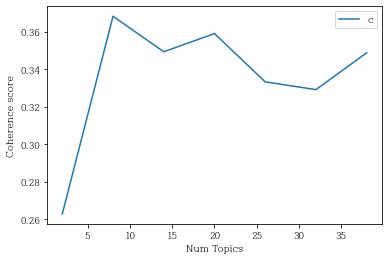

In [402]:
limit=40; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, author_comments_coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [403]:
for m, cv in zip(x, author_comments_coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.2629
Num Topics = 8  has Coherence Value of 0.3682
Num Topics = 14  has Coherence Value of 0.3493
Num Topics = 20  has Coherence Value of 0.3589
Num Topics = 26  has Coherence Value of 0.3333
Num Topics = 32  has Coherence Value of 0.3291
Num Topics = 38  has Coherence Value of 0.3487


In [384]:
optimal_model = author_comments_model_list[1]
model_topics = optimal_model.show_topics(formatted=False)
pprint(optimal_model.print_topics(num_words=20))

[(0,
  '0.035*"명품" + 0.027*"것" + 0.026*"영상" + 0.025*"사람" + 0.019*"돈" + 0.019*"하나" + '
  '0.019*"거" + 0.019*"보고" + 0.018*"그냥" + 0.017*"브랜드" + 0.014*"왜" + 0.013*"대리" '
  '+ 0.013*"제품" + 0.012*"분" + 0.011*"옷" + 0.010*"요" + 0.010*"제" + 0.009*"뭔가" + '
  '0.008*"항상" + 0.008*"만족"'),
 (1,
  '0.106*"언니" + 0.044*"진짜" + 0.026*"하울" + 0.020*"원피스" + 0.019*"옷" + 0.018*"즐" '
  '+ 0.017*"영상" + 0.017*"헤" + 0.014*"더" + 0.013*"쇼핑" + 0.012*"명품" + 0.011*"찰떡" '
  '+ 0.010*"샤넬" + 0.010*"생일" + 0.010*"헤이즐" + 0.009*"앞머리" + 0.009*"축하" + '
  '0.009*"가방" + 0.009*"주원" + 0.008*"선물"'),
 (2,
  '0.043*"저" + 0.018*"수" + 0.018*"댓글" + 0.016*"뭐" + 0.015*"때" + 0.015*"생각" + '
  '0.014*"정말" + 0.013*"이" + 0.012*"안" + 0.012*"것" + 0.011*"좀" + 0.009*"사랑" + '
  '0.009*"가요" + 0.009*"알" + 0.009*"정도" + 0.009*"꼭" + 0.008*"보기" + 0.008*"도" + '
  '0.007*"지금" + 0.007*"혹시"'),
 (3,
  '0.038*"가방" + 0.020*"거" + 0.016*"가죽" + 0.015*"에르메스" + 0.014*"말" + 0.012*"사람" '
  '+ 0.012*"무슨" + 0.012*"왜" + 0.011*"뭐" + 0.010*"걸" + 0.010*"거지" + 0.009*"문제" '
 

#### c) LDA on by Youtube Video

In [386]:
video_num = dict()
data_Noun_Only_Youtube_Luxury_Video_Comments = list()

start = 0
for video, comments in Noun_Only_Youtube_Luxury_Video_Comments.items():
    video_num[video] = start
    data_Noun_Only_Youtube_Luxury_Video_Comments.append([word[0] for word in comments])
    start += 1


In [387]:
# Create Dictionary
id2word_luxury_video_comments = corpora.Dictionary(data_Noun_Only_Youtube_Luxury_Video_Comments)

# Term Document Frequency
dtm_luxury_video_comments = [id2word_luxury_video_comments.doc2bow(text) for text in data_Noun_Only_Youtube_Luxury_Video_Comments]

In [344]:
ldamodel_youtube_luxury_video_comments = Lda(corpus=dtm_luxury_video_comments, update_every=1, num_topics=4, id2word = id2word_luxury_video_comments, passes=10)

In [345]:
pprint(ldamodel_youtube_luxury_video_comments.print_topics(num_words=30))

[(0,
  '0.039*"언니" + 0.025*"진짜" + 0.019*"영상" + 0.017*"가방" + 0.011*"구찌" + 0.011*"저" '
  '+ 0.009*"한별" + 0.008*"명품" + 0.007*"대리" + 0.007*"오늘" + 0.007*"더" + 0.006*"것" '
  '+ 0.006*"만족" + 0.006*"신발" + 0.006*"거" + 0.005*"샤넬" + 0.005*"정말" + '
  '0.004*"보고" + 0.004*"제" + 0.004*"사람" + 0.004*"하울" + 0.004*"말" + 0.004*"이" + '
  '0.004*"때" + 0.003*"사랑" + 0.003*"생각" + 0.003*"선물" + 0.003*"요" + 0.003*"눈" + '
  '0.003*"용"'),
 (1,
  '0.042*"언니" + 0.024*"영상" + 0.019*"진짜" + 0.012*"오늘" + 0.010*"옷" + 0.010*"명품" '
  '+ 0.008*"저" + 0.007*"것" + 0.006*"하울" + 0.006*"치유" + 0.006*"원피스" + '
  '0.005*"가방" + 0.005*"때" + 0.005*"거" + 0.005*"보고" + 0.005*"더" + 0.005*"하" + '
  '0.004*"정말" + 0.004*"항상" + 0.004*"즐" + 0.004*"사람" + 0.004*"브랜드" + 0.004*"시계" '
  '+ 0.004*"제" + 0.004*"헤" + 0.004*"사랑" + 0.004*"이" + 0.004*"말" + 0.004*"역시" + '
  '0.003*"로"'),
 (2,
  '0.030*"영상" + 0.028*"명품" + 0.021*"언니" + 0.016*"진짜" + 0.013*"한별" + 0.013*"하울" '
  '+ 0.011*"설명" + 0.011*"것" + 0.010*"저" + 0.009*"사람" + 0.009*"생각" + 0.008*"돈" '
  '+ 0.0

#### c-2) Find Optimal LDA Model for Youtube Video Data

In [392]:
video_comments_model_list, video_comments_coherence_values = compute_coherence_values( 
    dictionary=id2word_luxury_video_comments, 
    corpus=dtm_luxury_video_comments, 
    texts=data_Noun_Only_Youtube_Luxury_Author_Comments, 
    start=2, limit=40, step=6)

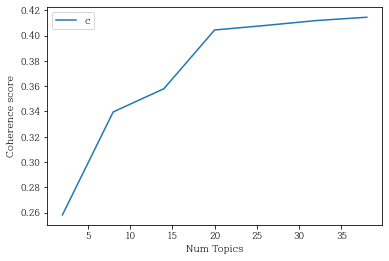

In [399]:
limit=40; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, video_comments_coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [404]:
for m, cv in zip(x, video_comments_coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.2581
Num Topics = 8  has Coherence Value of 0.3396
Num Topics = 14  has Coherence Value of 0.358
Num Topics = 20  has Coherence Value of 0.4045
Num Topics = 26  has Coherence Value of 0.408
Num Topics = 32  has Coherence Value of 0.4119
Num Topics = 38  has Coherence Value of 0.4146


In [396]:
optimal_model = video_comments_model_list[3]
model_topics = optimal_model.show_topics(formatted=False)
pprint(optimal_model.print_topics(num_words=20))

[(0,
  '0.062*"것" + 0.046*"저" + 0.037*"옷" + 0.034*"진짜" + 0.032*"브랜드" + 0.029*"때" + '
  '0.027*"알" + 0.022*"요" + 0.017*"느낌" + 0.017*"정말" + 0.016*"일" + 0.015*"처음" + '
  '0.014*"그" + 0.014*"한번" + 0.013*"안" + 0.012*"구매" + 0.012*"또" + 0.011*"좀" + '
  '0.010*"얘기" + 0.010*"계속"'),
 (1,
  '0.073*"언니" + 0.061*"구찌" + 0.057*"한별" + 0.057*"진짜" + 0.048*"가방" + 0.030*"신발" '
  '+ 0.019*"오늘" + 0.019*"저" + 0.019*"구두" + 0.018*"대리" + 0.017*"만족" + 0.012*"제" '
  '+ 0.011*"색" + 0.010*"제품" + 0.010*"하울" + 0.009*"눈" + 0.009*"머리" + '
  '0.009*"귀걸이" + 0.009*"미우미우" + 0.009*"완전"'),
 (2,
  '0.082*"언니" + 0.040*"선물" + 0.033*"명품" + 0.032*"사람" + 0.031*"생일" + 0.028*"축하" '
  '+ 0.023*"목걸이" + 0.021*"하울" + 0.016*"집" + 0.016*"샤넬" + 0.012*"신발" + '
  '0.011*"키" + 0.010*"전" + 0.010*"해" + 0.010*"기분" + 0.009*"찰떡" + 0.009*"구두" + '
  '0.008*"영" + 0.008*"자주" + 0.008*"부모님"'),
 (3,
  '0.123*"언니" + 0.052*"진짜" + 0.047*"하울" + 0.046*"즐" + 0.042*"헤" + 0.024*"헤이즐" '
  '+ 0.024*"앞머리" + 0.019*"샤넬" + 0.018*"얼굴" + 0.018*"쇼핑" + 0.013*"화이트" + '
  '